## The Machine Learning Workflow

Let's say we want to figure out whether or not a new learner will complete a specific course.  We are confident that the course has a good balance that allows a learner to understand any concept by applying it. Unfortunately, that doesn't always imply that everyone will complete a course.

So, how could we predict that a new learner will complete the course?

Let's say we've collected data for every current learner on the website. We know:

- How many lessons they've completed previously on the website.
- How many of the other courses they've completed.
- How many exercises they've successfully passed.
- How many hours they've spent on each individual lesson.
- Whether they've already completed the course.

Based on the data, we already know whether an existing learner has completed the course. Are there relevant details in the rest of the data that could help us find a pattern that relates a learner's actions on the website to the likelihood of their completing the course?

Maybe, upon exploring the data, we find that 90% of learners who completed the course:

- Completed more than L lessons previously.
- Spent more than H hours, on average, per lesson.
- Passed more than E exercises.

Given these patterns, can we say that a new learner who satisfies the above criteria will complete that course also?

Well, we can't guarantee it. But, the likelihood of that happening might be high if the new learner satisfies the above rules. What if we learn something new from the data that changes that likelihood? It could get lower or higher.

We can't always identify these patterns one at a time, especially when we have lots of data. This is exactly where `machine learning` can help.

Instead of making decisions based on patterns identified from information we already have, we can use machine learning to do it for us.

The small set of rules or criteria we identified above is essentially what a machine learning model does without us explicitly programming those rules. We train the model so it learns to identify those patterns from the data on its own. We then use the model to predict something given a new, unseen, input. That "something" might seem a bit ambiguous, but what we want to predict depends on the intended outcome or task. In this and the next few courses, we will cover such tasks and learn machine learning models that can help us with those tasks.

What we learned above gives us a quick introduction to the machine learning workflow:

- Data Collection.
- Data Exploration and Wrangling.
- Data Preparation (Feature Engineering).
- Building and training a model.
- Evaluating the model performance.
- Fine-tuning the model.
- Evaluating the model performance.

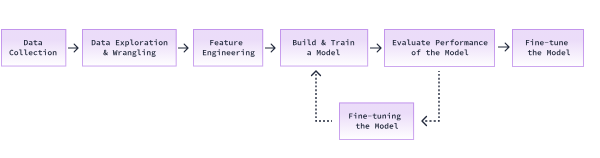

That might seem like a lot of steps and terminology! Some things might not be explicitly clear right away, but don't worry. Throughout this course, we will go through each step of the above workflow in more detail.

For the rest of this lesson, we will use a popular, python-based machine learning library called [scikit-learn](https://scikit-learn.org/) and learn more about this workflow. We'll also train a simple machine learning model to predict if a patient has breast cancer.

Please note that this lesson will focus on helping us familiarize with the workflow. Any concepts or terminology that might come across as confusing or challenging will be covered in varying depths across the remaining lessons and courses.

## Data Collection and Exploration

On the previous screen, we learned what machine learning is and about the machine learning workflow. Let's put what we learned into action!

We'll build a model that predicts whether a patient has breast cancer. We'll start with the data.

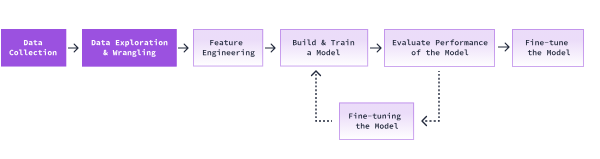

While it's possible, it's not always feasible to collect our own data. Fortunately, there are a lot of publicly available datasets that we can freely access and work with, depending on what kind of problem we want to solve.

We'll work with the [Breast Cancer Wisconsin (Diagnostic) Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The scikit-learn library stores several datasets, including this [breast cancer dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset), and makes it convenient for us to load and work with them.

On the first screen, we looked at what kind of data could be collected 

- How many lessons students have completed on the website.
- How many courses they've completed so far.
- How many exercises they've successfully passed.
- How many hours they've spent on each lesson.

Each of the above is called a feature. They all describe or are a property of our data. When we work with tabular data, each column name corresponds to a feature -- except one:

- Whether or not a learner has already completed the course.

The column corresponding to the above is called the `target variable` because that's what we want our model to predict. That's our target.

Every row for the above would contain information related to an individual learner. Each of these rows is called an observation or a feature vector. It's an n-dimensional vector of features.

Let's look at the dataset we'll be working with. The link to our dataset provides us with the following information

- There are a total of 30 attributes, or 30 features.
- There are a total of 569 instances or observations.
- There are two classes in the target variable:
    - WDBC-Malignant
    - WDBC-Benign

The above two classes, or labels, tell us whether a patient has a benign or a malignant tumor. For every observation, there's a corresponding class or label in our data.

Let's load in our dataset using scikit-learn's [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) function. The function will return an object with several attributes, a couple of which we will utilize:

- data stores the data points.
- target stores the value 0 if the tumor is benign or 1 if the tumor is malignant.

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [16]:
cancer_data = load_breast_cancer(as_frame=True)
cancer_df = cancer_data['data']
target = cancer_data['target']

cancer_df['target'] = target

In [9]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [10]:
cancer_df.shape

(569, 30)

In [13]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [17]:
cancer_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [15]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
